<a href="https://colab.research.google.com/github/neerabhi/NLP/blob/main/NLP_stop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
len(STOP_WORDS)

326

In [ ]:
nlp=spacy.load('en_core_web_sm')
doc=nlp("We just opened our wings, the flying part is coming soon")

In [ ]:
for token in doc:
  if not token.is_stop:
    print(token)

opened
wings
,
flying
coming
soon


In [ ]:
def preprocessor(text):
    doc = nlp(text)
    no_stop = []
    for token in doc:
        if not token.is_stop:
            no_stop.append(str(token))  # Convert token to string
    return " ".join(no_stop)


In [ ]:
preprocessor("Musk wants time to prepare for a trial over his")

'Musk wants time prepare trial'

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [3]:
v=TfidfVectorizer()
v.fit(corpus)
transform_ouput=v.transform(corpus)

In [6]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [7]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:

    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)

    #get the score
    idf_score = v.idf_[indx]

    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('/content/Ecommerce_data.csv')

In [14]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [16]:
df.shape

(24000, 2)

In [17]:
df['label'].value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


In [18]:
df['label']=df['label'].map({
    'Household' : 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

In [19]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,0
1,"Contrast living Wooden Decorative Box,Painted ...",0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,3
4,Indira Designer Women's Art Mysore Silk Saree ...,3


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df['Text'], df['label'], test_size=0.2)

In [21]:
y_train.value_counts()

,count
label,
2,4833
1,4822
0,4774
3,4771


In [22]:
y_test.value_counts()

,count
label,
3,1229
0,1226
1,1178
2,1167


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorize_idf', TfidfVectorizer()),
    ('KNN',KNeighborsClassifier())
])

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1226
           1       0.97      0.95      0.96      1178
           2       0.97      0.98      0.97      1167
           3       0.98      0.98      0.98      1229

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [28]:
from sklearn.naive_bayes import MultinomialNB
clf=Pipeline([
    ('vectorize_idf', TfidfVectorizer()),
    ('KNN',MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1226
           1       0.99      0.94      0.96      1178
           2       0.97      0.97      0.97      1167
           3       0.98      0.98      0.98      1229

    accuracy                           0.96      4800
   macro avg       0.97      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [32]:
from sklearn.ensemble import RandomForestClassifier

clf=Pipeline([
    ('vectorize_idf',TfidfVectorizer()),
    ('random_forest', RandomForestClassifier())
])
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1226
           1       0.98      0.98      0.98      1178
           2       0.98      0.97      0.98      1167
           3       0.99      0.98      0.98      1229

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



Use text pre-processing to remove stop words, punctuations and apply **lemmatization**

In [ ]:
from sklearn.en.

In [34]:
import spacy
nlp=spacy.load('en_core_web_sm')


def preprocess(text):
  doc=nlp(text)
  filtered_token=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_token.append(token.lemma_)

  return " ".join(filtered_token)


In [36]:
df['processed_text']=df['Text'].apply(preprocess)

In [37]:
df.head()

,Text,label,processed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,2,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,3,Indira Designer woman Art Mysore Silk Saree Bl...


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.processed_text, df['label'], test_size=0.2)
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1169
           1       0.98      0.98      0.98      1251
           2       0.98      0.98      0.98      1214
           3       0.98      0.98      0.98      1166

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1136,   10,   13,   10],
       [  15, 1225,    4,    7],
       [  17,   11, 1185,    1],
       [  10,    5,    4, 1147]])

Text(95.72222222222221, 0.5, 'Truth')

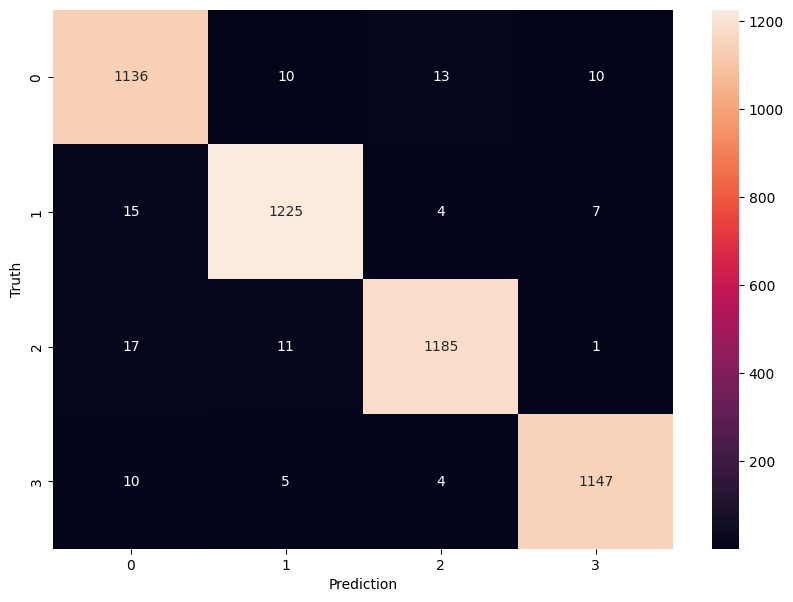

In [40]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')